In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import sklearn

DATA_PATH = './house-prices-advanced-regression-techniques/'
train = pd.read_csv(DATA_PATH + 'train.csv')
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [20]:
test = train[['Id', 'SalePrice']]
test.to_csv('test/test_230330.csv', index = False)

In [21]:
result = train.head(3)
result

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [31]:
result = train['SalePrice'].median()
result

163000.0

In [33]:
result = train['SalePrice'].mean()
result

180921.19589041095

In [27]:
result = train['SalePrice'].max()
result

755000

In [25]:
result = train['SalePrice'].min()
result

34900

In [36]:
train.shape

(1460, 81)

In [37]:
result = train['SalePrice'].std()
result

79442.50288288662

In [38]:
def check_na(data, head_num = 6):
    isnull_na = (data.isnull().sum() / len(data)) *100
    data_na = isnull_na.drop(isnull_na[isnull_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio': data_na,
                                'Data Type' : data.dtypes[data_na.index]})
    print("결측치 데이터 컬럼과 건수:\n", missing_data.head(head_num))
    
    check_na(train)

## log1p graph 그리기
- log1p와 log의 차이

In [ ]:
import numpy as np

cat_all_vars = train.select_dtypes(exclude=[np.number])
cat_vars = cat_all_vars.columns

for i in cat_vars:
    train[i] = train[i].fillna(train[i].mode()[0])
    
check_na(train)

In [39]:
import numpy as np

x=np.exp(3)
y=np.log(x)

print(y)

3.0


In [43]:
x= np.exp(3)
y=np.log1p(x)

y

3.048587351573742

In [44]:
x= 10* 3
y=np.log10(x)

y

1.4771212547196624

C:\Users\User\AppData\Local\Temp\ipykernel_11700\608734718.py:4: RuntimeWarning: divide by zero encountered in log
  y=np.log(x)


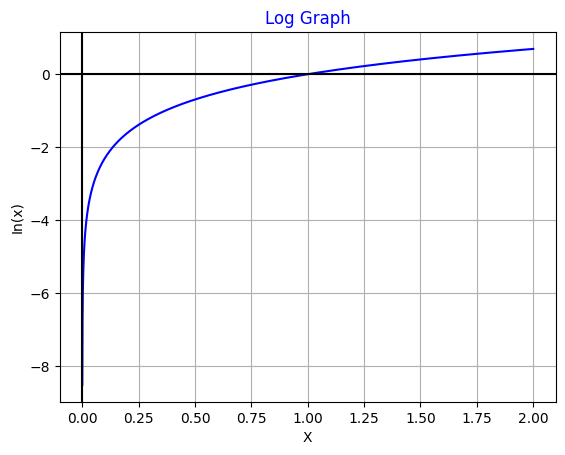

In [46]:
import matplotlib.pyplot as plt

x=np.linspace(-0/2, 2, 10000)
y=np.log(x)

fig = plt.figure()

plt.plot(x,y, 'b-')
plt.title('Log Graph', color = 'b')

plt.xlabel('X')
plt.ylabel('In(x)')

plt.grid()

plt.axhline(y=0, color= 'k')
plt.axvline(x=0, color = 'k')

plt.show()